In [2]:
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline
import used_funtions_2 as uf 

In [4]:

#################################################################################################
def ShowAmpPhz(A, date='', size=12 , text=False, title='', cmap='gray', save=True, vmin=0) :
    # print( "Top-Left Starting position on the global slice: " , TopLeftPxl )
    #-------------------------------------------------------
    import matplotlib.pyplot as plt 
    #-------------------------------------------------------
    from matplotlib.pyplot import figure ; 
    figsize = size
    matrix  = A 
    figure(facecolor=(1,1,1), num=None,
           figsize=(figsize, figsize ), 
           dpi=80, )
    plt.title(f'{title}\n{date}') 
    plt.imshow( matrix , cmap= cmap,) # origin = 'lower' ) 
    plt.colorbar(  fraction=0.0200, pad=0.11 ) 
    #plt.colorbar( ) 
    #plt.axis('off')
    
    if text == True : 
        for i in range( matrix.shape[1] ):
            for j in range( matrix.shape[0] ):
                c = int(matrix[j,i]*100)/100 # approximation (for better vizualt°)
                plt.text(i, j, str(c), va='center', ha='center') 
    if (save==True) :
        #plt.savefig( f"{title[-30:]}.png" )
        plt.savefig( f"{str(title).replace(' ','_')}.png" )
    plt.show() 
#################################################################################################



def LabelsList() :
    Labels=['',
            'Continuous urban fabric',
            'Discontinuous urban fabric',
            'Industrial or commercial units',
            'Road and rail networks and associated land',
            'Port areas',
            'Airports',
            'Mineral extraction sites',
            'Dump sites',
            'Construction sites',
            'Green urban areas',
            'Sport and leisure facilities',
            'Non-irrigated arable land',
            'Permanently irrigated land',
            'Rice fields',
            'Vineyards',
            'Fruit trees and berry plantations',
            'Olive groves',
            'Pastures',
            'Annual crops associated with permanent crops',
            'Complex cultivation patterns',
            'Agriculture with natural vegetation',
            'Agro-forestry areas',
            'Broad-leaved forest',
            'Coniferous forest',
            'Mixed forest',
            'Natural grasslands',
            'Moors and heathland',
            'Sclerophyllous vegetation',
            'Transitional woodland-shrub',
            'Beaches - dunes - sands',
            'Bare rocks',
            'Sparsely vegetated areas',
            'Burnt areas',
            'Glaciers and perpetual snow',
            'Inland marshes',
            'Peat bogs',
            'Salt marshes',
            'Salines',
            'Intertidal flats',
            'Water courses',
            'Water bodies',
            'Coastal lagoons',
            'Estuaries',
            'Sea and ocean',
            'NODATA',]

    return Labels


def pooling(mat,ksize,method='max',pad=False) :
    import numpy 
    '''Non-overlapping pooling on 2D or 3D data.

    <mat>: ndarray, input array to pool.
    <ksize>: tuple of 2, kernel size in (ky, kx).
    <method>: str, 'max for max-pooling, 
                   'mean' for mean-pooling.
    <pad>: bool, pad <mat> or not. If no pad, output has size
           n//f, n being <mat> size, f being kernel size.
           if pad, output has size ceil(n/f).

    Return <result>: pooled matrix.
    '''

    m, n = mat.shape[:2]
    ky,kx=ksize

    _ceil=lambda x,y: int(numpy.ceil(x/float(y)))

    if pad:
        ny=_ceil(m,ky)
        nx=_ceil(n,kx)
        size=(ny*ky, nx*kx)+mat.shape[2:]
        mat_pad=numpy.full(size,numpy.nan)
        mat_pad[:m,:n,...]=mat
    else:
        ny=m//ky
        nx=n//kx
        mat_pad=mat[:ny*ky, :nx*kx, ...]

    new_shape=(ny,ky,nx,kx)+mat.shape[2:]

    if method=='max':
        result=numpy.nanmax(mat_pad.reshape(new_shape),axis=(1,3))
    else:
        result=numpy.nanmean(mat_pad.reshape(new_shape),axis=(1,3))

    return result


                    
                    
                    
                    
                    
                    
                    
                    

################################################################################
def FindGoodAreas( Matwindow, color , 
                  Kernel = [3,3]  , 
                  startpointC = 0 ,
                  startpointR = 0 ,
                  stepsearchC = 1 ,
                  stepsearchR = 1 ,
                  shiftUL_R     = 1 ,
                  shiftUL_A     = 1 ,
                  show=True  ) : 
    import numpy as np 
    Places=np.zeros((Matwindow.shape[0],
                     Matwindow.shape[1])) 
    List_Of_TopLefts = []
    s = 0
    for i in range( startpointR,
                   (Matwindow.shape[0]-(Kernel[0])-1),
                   stepsearchR ) : 
        # on lat 
        for j in range( startpointC, 
                   (Matwindow.shape[1]-(Kernel[1])-1),
                   stepsearchC ) : 
            # on lon 
            sk = 0
            for k in range(Kernel[0]) : 
                for l in range(Kernel[1]) : 
                    #if (Matwindow[i+k,j+l] == color) : 
                    if ( Matwindow[i+k,j+l] == color ) : 
                        sk += 1 
            if ( sk == Kernel[0]*Kernel[1] ) : 
                #Places[i,j] = 1 
                Places[i+int(round(Kernel[0]/2)) ,
                       j+int(round(Kernel[1]/2))] = 1 
                #List_Of_TopLefts.append( [i,j])
                List_Of_TopLefts.append( [i+shiftUL_R,
                                          j+shiftUL_A ] ) # Le /2 !!!!!!!!!!!!!!!!!!!!!!!!!
                s += 1 

    print('Number Of Places Found :',s) 
    if (show == True) :
        Labels = LabelsList() 
        ShowAmpPhz( Places ,
                   size=5, text= False,
                   title  = f'Mapping Label { LabelsList()[ int(color) ] }',
                   cmap   ='gray') 
    #print( List_Of_TopLefts )
    return List_Of_TopLefts
    
################################################################################
#################################################################################################
#################################################################################################
                    
# PATHS
#post = "local"
post = "cluster"

if ( post == 'local' ) :
    path_r     = f"/home/zwartholm/Desktop/Stages/STAGE/Data/" 
    path_slc   = path_r # (here the same) 
    path_dates = f"/home/zwartholm/Desktop/Stages/STAGE/Data/"
    path_geom  = f"/home/zwartholm/Desktop/Stages/STAGE/Data/"
elif ( post == 'cluster' ) : 
    path_r     = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/" 
    path_slc   = path_r # (here the same) 
    path_dates = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/"
    path_geom  = f"/bettik/doinm/ALPS/D139/TMP/"

#path_r    = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/" # on the cluster
#path_dates = f"/home/boudaose/"


                    
                    
                    
                    

                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    

                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
#################################################################################################
def TimeInterval( start_date, Nb_Dates, nb_dates_max  ) : 
    #path2   = "/home/zwartholm/Desktop/Stages/STAGE/Data/LIST_dates.txt"
    path2    = path_dates+f"LIST_dates.txt"
    # Read a given number of lines 
    f = open( path2 , "r" ) 
    L = []
    for i in range( nb_dates_max ) : 
        a = f.readline() 
        L.append( int(a[-9:-1]) ) 
    f.close() 
    L = sorted(L[:], reverse=False ) 
    # print('Max Nb Of dates  : ', len(L) ) 
    StartIndex = L.index( int(start_date) ) # - 1 
    L = sorted(L[StartIndex:(StartIndex+Nb_Dates)], reverse=False )
    # print(' Nb Of studied dates  : ', len(L)  ) 
    return L 

def CorrCpx( S1 , S2 ) :
    # Complex Corr Coef 
    import numpy as np
    X     = (S1.flatten("C")*(np.conjugate(S2).flatten("C"))) 
    numer = np.mean(X)
    term1 = np.mean((np.absolute(S1))**2) 
    term2 = np.mean((np.absolute(S2))**2) 
    denom = np.sqrt(term1*term2) 
    Corr  = numer/denom
    ACorr   = np.absolute(Corr)
    #QCorr   = np.angle(Corr)
    #return Corr, ACorr, QCorr 
    return ACorr 
































def CovHPSD( S1 , S2, typ="with_mu" ) :
    # H+{SD} Temp.Cov Mat
    import numpy as np
    if (typ=="with_mu") :
        S1 = np.array(S1).flatten(order="C") 
        S2 = np.array(S2).flatten(order="C") 
        A1 = S1-S1.mean() 
        A2 = np.conjugate((S2-S2.mean())) 
        X  = np.dot(A1,(A2).T) / (len(S1)-1) 
        CovHPSD = X 
    else :
        S1 = np.array(S1).flatten(order="C") 
        S2 = np.array(S2).flatten(order="C") 
        A1 = S1 #-S1.mean() 
        A2 = np.conjugate(S2)  #-S2.mean())) 
        X  = np.dot(A1,(A2).T)/(len(S1)-1) 
        #X  = (A1*(A2).T).mean() # / (len(S1)-1) 
        CovHPSD = X 
    return CovHPSD 

################################################################################
def COH_COV_COVA( ListOfDates, C0, L0, Color, Pxl ) :
    import numpy as np
    L =  ListOfDates
    CohMat  = np.zeros( ( len(L), len(L)) ) 
    CovMat  = np.zeros( ( len(L), len(L)) , dtype = complex) 
    CovAMat = np.zeros( ( len(L), len(L)) ) 
    ###################################################################
    color = Color
    #i = Pxl
    #C0, L0 = X[Pxl]+Ran, Y[Pxl]+Azi  
    for i in range( len(L) ) : 
        for j in range( len(L) ) : 
            date1 = str(L[i]) 
            filename1 = f'Label_{color}/'+f'Imagette_Label_{color}/Pxl_{Pxl}_C0{C0}_L0{L0}_{date1}.dat'
            with open( filename1, 'rb') as f1:
                S1 = np.load(f1) 
            #--------------------------------
            date2 = str(L[j]) 
            filename2 = f'Label_{color}/'+f'Imagette_Label_{color}/Pxl_{Pxl}_C0{C0}_L0{L0}_{date2}.dat'
            with open( filename2, 'rb') as f2:
                S2 = np.load(f2) 
    ###################################################################
        #----------------------------------------
            CohMat[i][j]  = CorrCpx( S1, S2 ) 
            #----------------------------------------
            CovMat[i][j]  = CovHPSD( S1, S2 , typ="no_mu") # without mu, by hypothesis
            #----------------------------------------
            S1, S2 = np.absolute(S1), np.absolute(S2)
            CovAMat[i][j] = CovHPSD( S1, S2 )  # with_mu, by default
            #CovAMat[i][j] = np.cov( S1, S2 ) 
            #----------------------------------------
    return CohMat, np.absolute(CovMat), CovAMat
################################################################################

                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    

#################################################################################################
#################################################################################################
def Complex_Imagt( C0 , L0, Date, Imgt ) :
    """
    Returns :
    Z          : Complex Imagette (non-corrected yet as it comes from an slc) 
    A          : Its Amplitude
    Q          : Its Phase
    data       : Its date of aquisition
    Imgt.shape : Its shape [nbcols,nbrows]
    """
    #------------------------------------------------------
    # Reading (step to optimize) 
    from array import array 
    import numpy as np 
    #------------------------------------------------------
    def getPixelPos( C , L, FW ):
        """
        Returns the linear 2 positions of the targetted pixel
        Convention : From (0,0) to (FileWidth*2-1, FileLength-1)
        C : pixel s column
        L : pixel s row
        FW: File Width 
        """
        realPP = C*2 + L*FW*2
        imagPP = realPP + 1
        return realPP, imagPP
    #------------------------------------------------------
    TYP     = 'f'            # <-- 4 Bytes 
    nbbytes = 4 
    FW      = 26569 
    FL      = 31747 
    date    = Date
    rPp     = getPixelPos( C0 , L0, FW )[0] 
    #path    = f"/home/zwartholm/Desktop/Stages/STAGE/Data/{date}/"+f"{date}_coreg.slc"
    path = path_slc+f"{date}/{date}_coreg.slc"
    # On the server the path would be
    #path    = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/{date}/"+f"{date}_coreg.slc"
    #------------------------------------------------------
    A = np.zeros( Imgt ).T ; B = A.copy() 
    f = open( path , 'rb')  
    for i in range( Imgt[1] ) : 
        f.seek( ( 2*FW*i + rPp)*nbbytes , 0 ) 
        float_array = array( TYP ) 
        float_array.frombytes(f.read(Imgt[0]*nbbytes*2) ) # here the x2. because of BIP file
        
        for j in range(Imgt[0]) : 
            # real & imagnry part values
            a  , b   = float_array[2*j], float_array[2*j+1] 
            # Storing Real & Imaginary parts
            A[i][j] = a
            B[i][j] = b
    f.close() 
    #------------------------------------------------------
    i , j = 0, 0
    # Filling A & B in a complex Matrix Z 
    Z = np.zeros((Imgt[1],Imgt[0]), dtype=complex) 
    for i in range(Imgt[1]) : 
        for j in range(Imgt[0]) : 
            Z[i][j] = A[i][j] + B[i][j]*1.j
    return Z, A, B, date, Imgt 

#################################################################################################
#################################################################################################
#################################################################################################


## Read & Extract from the Radar.unw BIL file 
#------------------------------------------------------
def getPixelPos_BIL( C , L, FW ):
    """
    Returns the 2 positions of the targetted pixel : (AmpPosition & PhazPosition)
    Convention : From (0,0) to (FW, 2*FL)
    C : pixel's Column
    L : pixel's Row
    FW: File Width 
    """
    # Amplitude Part Position
    AmpPP = C*1 + L*FW*2 
    # Phase Part Position
    PhazPP = AmpPP + FW
    return AmpPP, PhazPP
#------------------------------------------------------

# For 4look reeading
# * Reading function
def Complex_Imagt_BIL(C0, L0, Date, ImgtBIL, chemin='') :
    import numpy as np
    from array import array 

    # Date of the aquisition 
    date    = Date

    # The path where to find the file to read 
    if ( chemin == '' ) : 
        path = path_r+f"{date}/radar_HDR.unw" 
        #------------------------------------------------------
        # Creating an Amplitude & Phase Matrices to store values
        A = np.zeros( ImgtBIL ).T ; Q = A.copy() 
        # We define the 'type' of the stored values in the Binary File. (here 4Bytes Float) 
        TYP     = 'f'            # <-- single precision (4 Bytes) float
        # Number of Bytes (Octets) 
        nbbytes = 4 
        # File Width (the BIL radar.unw) 1-look on Azimuth, 4-look on Range
        FW      = 6642 ; FL    =  31747*2          # from the '.rsc' of radar file
        # Amplitude Part Position
        APp     = getPixelPos_BIL( C0 , L0, FW )[0] 
        # Phase Part Position
        QPp     = getPixelPos_BIL( C0 , L0, FW )[1] 


    else : 
        path = path_r+f"{date}/{date}_coreg.unw" 
        #------------------------------------------------------
        # Creating an Amplitude & Phase Matrices to store values
        A = np.zeros( ImgtBIL ).T ; Q = A.copy() 
        # We define the 'type' of the stored values in the Binary File. (here 4Bytes Float) 
        TYP     = 'f'            # <-- single precision (4 Bytes) float
        # Number of Bytes (Octets) 
        nbbytes = 4 
        # File Width (the BIL radar.unw) 1-look on Azimuth, 4-look on Range
        FW      = 26569 ; FL    =  31747*2          # from the '.rsc' of radar file
        # Amplitude Part Position
        APp     = getPixelPos_BIL( C0 , L0, FW )[0] 
        # Phase Part Position
        QPp     = getPixelPos_BIL( C0 , L0, FW )[1] 
        # Date of the aquisition 
        #date    = Date


    #path    = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/{date}/"+f"radar_HDR.unw" 
    #------------------------------------------------------
    f = open( path , 'rb')  
    # Extracting by couple of lines
    for i in range( ImgtBIL[1] ) : # on rows
        ##  Extracting Amplitude  ##
        f.seek( ( i*FW*2 + APp)*nbbytes , 0 )     
        float_arrayA = array( TYP ) 
        float_arrayA.frombytes(f.read( ImgtBIL[0]*1*(nbbytes) ) ) # on columns
        ##  Extracting Phase      ##
        f.seek( ( i*FW*2 + QPp)*nbbytes , 0 ) 
        float_arrayQ = array( TYP ) 
        float_arrayQ.frombytes(f.read( ImgtBIL[0]*1*(nbbytes) ) ) # on columns
        # Store extracted values, every line
        A[i][:] = float_arrayA 
        Q[i][:] = float_arrayQ 
    f.close() 
    #------------------------------------------------------
    return A, Q, date
#################################################################################################
#################################################################################################
#################################################################################################


## Read & Extract from the Radar.unw BIL file 
#------------------------------------------------------
def getPixelPos_BIL_Burst( C , L, FW ):
    """
    Returns the 2 positions of the targetted pixel : (AmpPosition & PhazPosition)
    Convention : From (0,0) to (FW, 2*FL)
    C : pixel's Column
    L : pixel's Row
    FW: File Width 
    """
    # Amplitude Part Position
    # AmpPP = C*1 + L*FW*2 
    AmpPP = C*1 + L*FW*1 
    # Phase Part Position
    PhazPP = AmpPP # + FW
    return AmpPP   , PhazPP
#------------------------------------------------------

# For 4look reeading
# * Reading function
def Complex_Imagt_BIL_Burst(C0, L0, Date, ImgtBIL) :
    import numpy as np
    from array import array 
    #------------------------------------------------------
    # Creating an Amplitude & Phase Matrices to store values
    A = np.zeros( ImgtBIL ).T ; Q = A.copy() 
    # We define the 'type' of the stored values in the Binary File. (here 4Bytes Float) 
    TYP     = 'f'            # <-- single precision (4 Bytes) float
    # Number of Bytes (Octets) 
    nbbytes = 4 
    # File Width (the BIL radar.unw) 1-look on Azimuth, 4-look on Range
    FW      = 6642 ; FL    =  31747*1          # from the '.rsc' of radar file
    # Amplitude Part Position # here : not an amplitude
    APp     = getPixelPos_BIL_Burst( C0 , L0, FW )[0] 
    # Phase Part Position
    QPp     = getPixelPos_BIL_Burst( C0 , L0, FW )[1] 
    # Date of the aquisition 
    date    = Date
    
    # The path where to find the file to read
    #path = f"/home/zwartholm/Desktop/Stages/STAGE/Data/{date}/"+f"radar_HDR.unw"
    #path = path_r+f"{date}/radar_HDR.unw"
    path = path_r+f"{date}/sd_corr.unw"
    
    
    #path    = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/{date}/"+f"radar_HDR.unw" 
    #------------------------------------------------------
    f = open( path , 'rb')  
    # Extracting by couple of lines
    for i in range( ImgtBIL[1] ) : # on rows
        ##  Extracting Amplitude  ##
        #f.seek( ( i*FW*2 + APp)*nbbytes , 0 )     
        f.seek( ( i*FW*1 + APp)*nbbytes , 0 )     
        float_arrayA = array( TYP ) 
        float_arrayA.frombytes(f.read( ImgtBIL[0]*1*(nbbytes) ) ) # on columns
        ##  Extracting Phase      ##
        #f.seek( ( i*FW*2 + QPp)*nbbytes , 0 ) 
        f.seek( ( i*FW*1 + QPp)*nbbytes , 0 ) 
        float_arrayQ = array( TYP ) 
        float_arrayQ.frombytes(f.read( ImgtBIL[0]*1*(nbbytes) ) ) # on columns
        # Store extracted values, every line
        A[i][:] = float_arrayA 
        Q[i][:] = float_arrayQ 
    f.close() 
    #------------------------------------------------------
    return A, Q, date
#################################################################################################
#################################################################################################



#################################################################################################
#################################################################################################
def ExtractInterpolate(C0, L0, date, Imgt  ) :
    import numpy as np 
    import matplotlib.pyplot as plt 
    """Extraction + Interpolation """
    # If we want to see all figures during process run
    show  = False
    #show  = True
    # Left columns (Column 0 ) in the BIL file 
    C0BIL = int(C0/4) 
    
    if ( (C0BIL)!=(C0/4) ) :
        print( "!!! Imagetes 1&2 from BIL&BIP are NOT samely pointed  !!!" )
    # On the BIL 4-look (on range) 
    ImgtBIL =  (int(Imgt[0]/4.) , Imgt[1])
    # Verification 
    #
    #
    if ( ImgtBIL[0] != (Imgt[0]/4.) ) : 
        print( "!!! Imagetes 1&2 from BIL&BIP are NOT well Superposed !!!" )
    # # #
    # "Estimated Amplitude" & "Absolute phase" extracted 
    A, Q, _ = Complex_Imagt_BIL(C0BIL, L0, date, ImgtBIL) 
    # # -------------------------------------------------
    if show == True : 
        from matplotlib.pyplot import figure ; figsize = 5
        figure(num=None, figsize=(figsize, figsize ), 
               dpi=80, ) 
        plt.title("$Phase^{Absolute}_{Geo}$\n4-look"+f'\n{date}')
        plt.imshow( Q, 'hsv_r' ) 
        plt.colorbar()
        plt.show() 
        
    # -------------------------------------------------
    if (show==True) : 
        print( ' Q (absolute) :' , Q.shape ) 
        # -------------------------------------------------
        PXL = [ C0BIL+i for i in range( len(Q[0]) ) ]
        # -------------------------------------------------
        plt.title(f'Phases along # Rows\n{date}') 
        n   = 4
        #k   = int((ImgtBIL[1]/n))+1 
        k   = int((ImgtBIL[1]/n)) 
        for i in range( n-1 ) : 
            #print(i*k)
            plt.plot( PXL, Q[i*k]   ) 
        plt.xlabel('Range Pixel (4-look)') 
        plt.ylabel('Phase Value'         ) 
        plt.show() 
    # -------------------------------------------------
    # -------------------------------------------------
    # one curve before & after interpolation (of one row), just to visualize
    # -------------------------------------------------
    width   = ImgtBIL[0]
    starts  = C0BIL
    x       = [ ( (2.5-1)/4. ) + C0BIL+i for i in range( ImgtBIL[0] ) ] # radar coordinates 
    y       = Q[0]                    # radar values 
    xvals   = [ (C0+i)/4.0 for i in range( ImgtBIL[0]*(4) ) ] # SLC coordinates 
    yinterp = np.interp(xvals, x, y)
    # -------------------------------------------------
    if (show==True) : 
        print(  'Abscisses   : ' , len(x)  )
        print(  "MatrixRadar : " , Q.shape,  
              '\nyinterp     : ' , len(yinterp) )
        # -------------------------------------------------
        from matplotlib.pyplot import figure ; figsize = 7
        figure(num=None, figsize=(figsize+5, figsize ), dpi=80, ) 
        plt.title('Shifted by 2.5 pixels') 
        plt.plot(x    ,  y     , 'o', Label='PxlVal Radar'      )
        plt.plot(xvals, yinterp, '+', Label='PxlVal Interpolated', c='g')
        plt.legend()
        plt.show() 
    # -------------------------------------------------
    # Interpolation of all the window (imagette)
    # -------------------------------------------------
    # [nbLignes, nbColognes]
    Q_interp = np.zeros( (Q.shape[0], 4*Q.shape[1]) ) 
    # -------------------------------------------------
    for i in range(Q.shape[0]) :
        width   = ImgtBIL[0]
        starts  = C0BIL
        x       = [ ( (2.5-1)/4. ) + C0BIL+i for i in range( ImgtBIL[0] ) ] # radar coordinates 
        y       = Q[i]                                                      # Radar Pixel Values 
        #xvals   = [ (C0+i)/4.0 for i in range( ImgtBIL[0]*(4) ) ]           # SLC coordinates 
        xvals   = [ (C0+i)/4.0 for i in range( ImgtBIL[0]*(4) ) ]           # SLC coordinates 
        yinterp = np.interp(xvals, x, y)                                    # SLC Pixel Values 
        Q_interp[i][:] = yinterp 
    # -------------------------------------------------
    if (show==True) : 
        print(  'Abscisses   : ' , len(x)  )
        print(  "MatrixRadar : " , Q_interp.shape,  
              '\nyinterp     : ' , len(yinterp) )
    # -------------------------------------------------
    if (show==True) : 
        plt.title('Interp phases along columns\nfor many rows') 
        for i in range(0, ImgtBIL[1] ) : 
            plt.plot( xvals, Q_interp[i][:] , '+')
        plt.show() 
    # -------------------------------------------------
    if (show==True) : 
        print(Q_interp.shape) 
    # -------------------------------------------------
    # Interpolated window (phase [-pi,+pi]) 
    Q_mod   = np.angle( np.exp( (Q)*1.j       ) ) 
    Q_i_mod = np.angle( np.exp( (Q_interp)*1.j) ) 
    # ------------------------------------------------- 
    Q_i_mod_1 = Q_i_mod 
    Q_i_abs_1 = Q_interp 
    # ------------------------------------------------- 
    if (show==True) : 
        # ------------------------------------------------- 
        print(Q_interp.shape) 
        # ------------------------------------------------- 
        from matplotlib.pyplot import figure ; figsize = 5 
        figure(num=None, figsize=(figsize, figsize ), dpi=80, ) 
        plt.title('$Phase^{Centered}_{Geo}$\n4-look'+f'\n{date}') 
        plt.imshow( Q_mod, 'hsv_r' ) 
        plt.colorbar() 
        plt.show() 
        # ------------------------------------------------- 
        figure(num=None, figsize=(figsize, figsize ), dpi=80, ) 
        plt.title('$Phase^{Centered}_{Geo}$\n1-look'+f'\n{date}') 
        plt.imshow( Q_i_mod, 'hsv_r' ) 
        plt.colorbar() 
        plt.show() 
        # ------------------------------------------------- 

    return Q_i_abs_1 , Q_i_mod_1

#################################################################################################
#################################################################################################




#################################################################################################
#################################################################################################
def ExtractInterpolateBurst(C0, L0, date, Imgt  ) :
    import numpy as np 
    import matplotlib.pyplot as plt 
    """Extraction + Interpolation """
    # If we want to see all figures during process run
    show  = False
    #show  = True
    # Left columns (Column 0 ) in the BIL file 
    C0BIL = int(C0/4) 
    
    if ( (C0BIL)!=(C0/4) ) :
        print( "!!! Imagetes 1&2 from BIL&BIP are NOT samely pointed  !!!" )
    # On the BIL 4-look (on range) 
    ImgtBIL =  (int(Imgt[0]/4.) , Imgt[1])
    # Verification 
    #
    #
    if ( ImgtBIL[0] != (Imgt[0]/4.) ) : 
        print( "!!! Imagetes 1&2 from BIL&BIP are NOT well Superposed !!!" )
    # # #
    # "Estimated Amplitude" & "Absolute phase" extracted 
    A, Q, _ = Complex_Imagt_BIL_Burst(C0BIL, L0, date, ImgtBIL) 
    # # -------------------------------------------------
    if show == True : 
        from matplotlib.pyplot import figure ; figsize = 5
        figure(num=None, figsize=(figsize, figsize ), 
               dpi=80, ) 
        plt.title("$Phase^{Absolute}_{Geo}$\n4-look"+f'\n{date}')
        plt.imshow( Q, 'hsv_r' ) 
        plt.colorbar()
        plt.show() 
        
    # -------------------------------------------------
    if (show==True) : 
        print( ' Q (absolute) :' , Q.shape ) 
        # -------------------------------------------------
        PXL = [ C0BIL+i for i in range( len(Q[0]) ) ]
        # -------------------------------------------------
        plt.title(f'Phases along # Rows\n{date}') 
        n   = 4
        #k   = int((ImgtBIL[1]/n))+1 
        k   = int((ImgtBIL[1]/n)) 
        for i in range( n-1 ) : 
            #print(i*k)
            plt.plot( PXL, Q[i*k]   ) 
        plt.xlabel('Range Pixel (4-look)') 
        plt.ylabel('Phase Value'         ) 
        plt.show() 
    # -------------------------------------------------
    # -------------------------------------------------
    # one curve before & after interpolation (of one row), just to visualize
    # -------------------------------------------------
    width   = ImgtBIL[0]
    starts  = C0BIL
    x       = [ ( (2.5-1)/4. ) + C0BIL+i for i in range( ImgtBIL[0] ) ] # radar coordinates 
    y       = Q[0]                    # radar values 
    xvals   = [ (C0+i)/4.0 for i in range( ImgtBIL[0]*(4) ) ] # SLC coordinates 
    yinterp = np.interp(xvals, x, y)
    # -------------------------------------------------
    if (show==True) : 
        print(  'Abscisses   : ' , len(x)  )
        print(  "MatrixRadar : " , Q.shape,  
              '\nyinterp     : ' , len(yinterp) )
        # -------------------------------------------------
        from matplotlib.pyplot import figure ; figsize = 7
        figure(num=None, figsize=(figsize+5, figsize ), dpi=80, ) 
        plt.title('Shifted by 2.5 pixels') 
        plt.plot(x    ,  y     , 'o', Label='PxlVal Radar'      )
        plt.plot(xvals, yinterp, '+', Label='PxlVal Interpolated', c='g')
        plt.legend()
        plt.show() 
    # -------------------------------------------------
    # Interpolation of all the window (imagette)
    # -------------------------------------------------
    # [nbLignes, nbColognes]
    Q_interp = np.zeros( (Q.shape[0], 4*Q.shape[1]) ) 
    # -------------------------------------------------
    for i in range(Q.shape[0]) :
        width   = ImgtBIL[0]
        starts  = C0BIL
        x       = [ ( (2.5-1)/4. ) + C0BIL+i for i in range( ImgtBIL[0] ) ] # radar coordinates 
        y       = Q[i]                                                      # Radar Pixel Values 
        #xvals   = [ (C0+i)/4.0 for i in range( ImgtBIL[0]*(4) ) ]           # SLC coordinates 
        xvals   = [ (C0+i)/4.0 for i in range( ImgtBIL[0]*(4) ) ]           # SLC coordinates 
        yinterp = np.interp(xvals, x, y)                                    # SLC Pixel Values 
        Q_interp[i][:] = yinterp 
    # -------------------------------------------------
    if (show==True) : 
        print(  'Abscisses   : ' , len(x)  )
        print(  "MatrixRadar : " , Q_interp.shape,  
              '\nyinterp     : ' , len(yinterp) )
    # -------------------------------------------------
    if (show==True) : 
        plt.title('Interp phases along columns\nfor many rows') 
        for i in range(0, ImgtBIL[1] ) : 
            plt.plot( xvals, Q_interp[i][:] , '+')
        plt.show() 
    # -------------------------------------------------
    if (show==True) : 
        print(Q_interp.shape) 
    # -------------------------------------------------
    # Interpolated window (phase [-pi,+pi]) 
    Q_mod   = np.angle( np.exp( (Q)*1.j       ) ) 
    Q_i_mod = np.angle( np.exp( (Q_interp)*1.j) ) 
    # ------------------------------------------------- 
    Q_i_mod_1 = Q_i_mod 
    Q_i_abs_1 = Q_interp 
    # ------------------------------------------------- 
    if (show==True) : 
        # ------------------------------------------------- 
        print(Q_interp.shape) 
        # ------------------------------------------------- 
        from matplotlib.pyplot import figure ; figsize = 5 
        figure(num=None, figsize=(figsize, figsize ), dpi=80, ) 
        plt.title('$Phase^{Centered}_{Geo}$\n4-look'+f'\n{date}') 
        plt.imshow( Q_mod, 'hsv_r' ) 
        plt.colorbar() 
        plt.show() 
        # ------------------------------------------------- 
        figure(num=None, figsize=(figsize, figsize ), dpi=80, ) 
        plt.title('$Phase^{Centered}_{Geo}$\n1-look'+f'\n{date}') 
        plt.imshow( Q_i_mod, 'hsv_r' ) 
        plt.colorbar() 
        plt.show() 
        # ------------------------------------------------- 

    return Q_i_abs_1 , Q_i_mod_1

#################################################################################################
#################################################################################################
#def InterferogCorrected ( date1, date2 ) : 
# def InterferogCorrected( C0, L0, date1, date2 , Imgt ) : 
def InterferoContextCrop( C0, L0, date1, date2 , Imgt=[12,3], CONTEXT=[500,500] ) : 
    
    if (Imgt[0]<=90)*(Imgt[1]<=90) :
        mod  = 100 
        Cst  = 3 # 4*3           # against N100 
        show = False
        if (show==True) :
            ################################################
            print( 'C0, L0 :', C0, L0 ) 

            print( 'Cst :', Cst )
            C0    = C0 - Cst
            print( 'C0 - Cst :', C0  ) 
            Cmod1 = C0%100 ; Lmod1 = L0%100 
            print( 'Cmod1 :', Cmod1, 'Lmod1 :', Lmod1 )
            C0p   = ( C0 - Cmod1 )  ; L0p = ( L0 - Lmod1 ) ;
            print( 'C0p :', C0p, 'L0p :', L0p )
            Cmod2 = C0p%4 
            print( 'Cmod2 :', Cmod2 )
            C0pp  = C0p - Cmod2  ; L0pp = L0p 
            print( 'C0pp :', C0pp,  'L0pp :', L0pp )
            ################################################
        else :
            #print( 'Cst :', Cst )
            C0    = C0 - Cst
            #print( 'C0 - Cst :', C0  ) 
            #Cmod1 = C0%100 ; Lmod1 = L0%100 
            Cmod1 = C0%mod ; Lmod1 = L0%mod 
            #print( 'Cmod1 :', Cmod1, 'Lmod1 :', Lmod1 )
            C0p   = ( C0 - Cmod1 )  ; L0p = ( L0 - Lmod1 ) ;
            #print( 'C0p :', C0p, 'L0p :', L0p )
            Cmod2 = C0p%4 
            #print( 'Cmod2 :', Cmod2 )
            C0pp  = C0p - Cmod2  ; L0pp = L0p 
            #print( 'C0pp :', C0pp,  'L0pp :', L0pp )
            ################################################
        #Imgt100 = [int(mod)+20, int(mod)+20] 
        #Imgt100 = [int(mod)+2000, int(mod)+2000] 
        #Imgt100 = [ int(2*8*200), int(2*2*200) ] 
        #s = 2
        #Imgt100 = [ int(s*4*4*100), int(s*1*4*100) ] 
        #Imgt100 = [ int(s*4*1000), int(s*1*1000) ] 
        Imgt100 = CONTEXT
        #Z, _,_,_ ... = ( C0'', L0', 100, 100 )
        if (show==True) :
            ################################################
            # Correcting the shifts
            C00 = Cmod1 + Cmod2 + Cst 
            print( 'C00 :', C00 )
            L00 = Lmod1 
            print( 'Lmod1 :', Lmod1 )
            ########################################################
        else : 
            ################################################
            # Correcting the shifts
            C00 = Cmod1 + Cmod2 + Cst 
            #print( 'C00 :', C00 )
            L00 = Lmod1 
            #print( 'Lmod1 :', Lmod1 )
            ########################################################

        import numpy as np 
        import matplotlib.pyplot as plt 
        # Extracting the correspondant imgt 
        # from the unwrapped radar_img (4-looked) (BIL) 
        print("C0  , L0   : ", C0+Cst, L0  ) 
        print("Context Coordinates : C0pp, L0pp : ", C0pp  , L0pp) 
        print("Context Dimensions : Imgt100 : ", Imgt100[0]  , Imgt100[1] ) 
        print("C00 , L00  : ", C00   , L00 ) 
        
        Q_i_abs_1, Q_i_mod_1 = ExtractInterpolate(C0pp, L0pp, date1, Imgt100  ) 
        Q_i_abs_2, Q_i_mod_2 = ExtractInterpolate(C0pp, L0pp, date2, Imgt100  ) 
        
        Q_ib_abs_1, _        = ExtractInterpolateBurst(C0pp, L0pp, date1, Imgt100  ) 
        Q_ib_abs_2, _        = ExtractInterpolateBurst(C0pp, L0pp, date2, Imgt100  ) 
        
        #######################################################################
        # Extracting the complex imgt from the coreg_slice (1-looked) (BIP) 
        Z_slc_1, _, _, _, _ = Complex_Imagt( C0pp, L0pp, date1, Imgt100 ) 
        Z_slc_2, _, _, _, _ = Complex_Imagt( C0pp, L0pp, date2, Imgt100 ) 
        #################################################################
        # Correction (geometry) 
        # 1° way
        Z_cor_1_context = Z_slc_1*np.exp( (Q_i_mod_1-Q_ib_abs_1)*1.j ) # *np.exp( -(Q_ib_abs_1)*1.j )  
        Z_cor_2_context = Z_slc_2*np.exp( (Q_i_mod_2-Q_ib_abs_2)*1.j ) # *np.exp( -(Q_ib_abs_2)*1.j )  
        
        ###################################################
        # Cropping 
        Z_cor_1_crop = Z_cor_1_context[ L00: (L00+Imgt[1]) , C00: (C00+Imgt[0]) ] 
        Z_cor_2_crop = Z_cor_2_context[ L00: (L00+Imgt[1]) , C00: (C00+Imgt[0]) ] 
        # ------------------------------------------------------
        # Interferograms
        Z_interf_context = ( Z_cor_1_context*np.conjugate( Z_cor_2_context ) )   
        Z_interf_crop    = ( Z_cor_1_crop   *np.conjugate( Z_cor_2_crop    ) )   
        # ------------------------------------------------------
        dates = str( f"{str(date1)}*{str(date2)}" ) 
        #return Z, Az , Qz, dates, Z_slc_1, Z_slc_2
        return Z_interf_context, Z_interf_crop, Z_cor_1_context, Z_cor_2_context, Z_cor_1_crop, Z_cor_2_crop
    else :
        return print( "Careful Imagette dimensions are too big !" )
    #return Z_interf_context, Z_interf_crop, Z_cor_1_context, Z_cor_2_context, Z_cor_1_crop, Z_cor_2_crop

#################################################################################################
#################################################################################################


#################################################################################################
def ExtractCorrectContextCrop( C0, L0, date1, Imgt=[12,3], CONTEXT=[120,120] ) : 
    
    if (Imgt[0]<=90)*(Imgt[1]<=90) :
        mod  = 100 
        Cst  = 0 # 4*3           # against N100 
        show = False
        if (show==True) :
            ################################################
            print( 'C0, L0 :', C0, L0 ) 

            print( 'Cst :', Cst )
            C0    = C0 - Cst
            print( 'C0 - Cst :', C0  ) 
            Cmod1 = C0%100 ; Lmod1 = L0%100 
            print( 'Cmod1 :', Cmod1, 'Lmod1 :', Lmod1 )
            C0p   = ( C0 - Cmod1 )  ; L0p = ( L0 - Lmod1 ) ;
            print( 'C0p :', C0p, 'L0p :', L0p )
            Cmod2 = C0p%4 
            print( 'Cmod2 :', Cmod2 )
            C0pp  = C0p - Cmod2  ; L0pp = L0p 
            print( 'C0pp :', C0pp,  'L0pp :', L0pp )
            ################################################
        else :
            #print( 'Cst :', Cst )
            C0    = C0 - Cst
            #print( 'C0 - Cst :', C0  ) 
            #Cmod1 = C0%100 ; Lmod1 = L0%100 
            Cmod1 = C0%mod ; Lmod1 = L0%mod 
            #print( 'Cmod1 :', Cmod1, 'Lmod1 :', Lmod1 )
            C0p   = ( C0 - Cmod1 )  ; L0p = ( L0 - Lmod1 ) ;
            #print( 'C0p :', C0p, 'L0p :', L0p )
            Cmod2 = C0p%4 
            #print( 'Cmod2 :', Cmod2 )
            C0pp  = C0p - Cmod2  ; L0pp = L0p 
            #print( 'C0pp :', C0pp,  'L0pp :', L0pp )
            ################################################
        Imgt100 = CONTEXT
        #Z, _,_,_ ... = ( C0'', L0', 100, 100 )
        if (show==True) :
            ################################################
            # Correcting the shifts
            C00 = Cmod1 + Cmod2 + Cst 
            print( 'C00 :', C00 )
            L00 = Lmod1 
            print( 'Lmod1 :', Lmod1 )
            ########################################################
        else : 
            ################################################
            # Correcting the shifts
            C00 = Cmod1 + Cmod2 + Cst 
            #print( 'C00 :', C00 )
            L00 = Lmod1 
            #print( 'Lmod1 :', Lmod1 )
            ########################################################

        import numpy as np 
        import matplotlib.pyplot as plt 
        # Extracting the correspondant imgt 
        # from the unwrapped radar_img (4-looked) (BIL) 
        #print("C0  , L0   : ", C0+Cst, L0  ) 
        #print("Context Coordinates : C0pp, L0pp : ", C0pp  , L0pp) 
        #print("Context Dimensions : Imgt100 : ", Imgt100[0]  , Imgt100[1] ) 
        #print("C00 , L00  : ", C00   , L00 ) 
        
        Q_i_abs_1, Q_i_mod_1 = ExtractInterpolate(C0pp, L0pp, date1, Imgt100  ) 
        Q_ib_abs_1, _        = ExtractInterpolateBurst(C0pp, L0pp, date1, Imgt100  ) 
        #######################################################################
        # Extracting the complex imgt from the coreg_slice (1-looked) (BIP) 
        Z_slc_1, _, _, _, _ = Complex_Imagt( C0pp, L0pp, date1, Imgt100 ) 
        #################################################################
        # Correction (geometry) 
        # 1° way
        Z_cor_1_context = Z_slc_1*np.exp( (Q_i_mod_1-Q_ib_abs_1)*1.j ) # 
        ###################################################
        # Cropping 
        Z_cor_1_crop = Z_cor_1_context[ L00: (L00+Imgt[1]) , C00: (C00+Imgt[0]) ] 
        ###################################################
        #dates = str( f"{str(date1)}*{str(date2)}" ) 
                    
        return Z_cor_1_context, Z_cor_1_crop , [C00,L00,Imgt[0],Imgt[1], C0pp, L0pp,] 
    else :
        return print( "Imagette dimensions are too big !" ) 
        #############################################################################


In [5]:
# on the whole matrix
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


In [6]:
import numpy as np
import matplotlib.pylab as plt 
#%matplotlib inline

Ran, Azi = 20636, 15219     # Top-Left of the General map. (Harmaliere)
#RanSHP, AziSHP= 6400, 1600 
C0 = (Ran-Ran%100) - 200*4
L0 = (Azi-Azi%100) - 200
SHP = 402

A, _, _ = Complex_Imagt_BIL( C0, L0, 
                            Date='30211332', 
                            ImgtBIL= [ SHP*4 , SHP ]  , 
                            chemin='stack') 


In [13]:
import os 
import sys 
sys.path.append(".") 
import torch.nn as nn
"""
#from saved_net_1 import Net 
from saved_net_1_15 import Net 

# load a CNNet 
model = Net().to(device) 
#print( model ) 

#modelpath = f"saved_cnn_1_1C.pt" 
modelpath = f"cnn_2021_06_24_00-05_1C_F9.pt" 
model.load_state_dict(torch.load( modelpath )) 
"""


LColors=[1, 2, 3, 12, 18, 20, 21, 23, 24, 25, 26, 27, 29, 32, 40] 
#for i in  LColors  : 
    #print(i, uf.LabelsList()[i]) 
print("") 
#print( len(LColors) ) 


###############################################
Cref, Lref = C0, L0 

In [17]:
%%time





COL    = [] 
COORDs = [] 




for k in range( 40 ) : 
    
    #k = 

    filename = f"/bettik/boudaose/TESTING_Harmaliere/Block_{k}/CsLs_{k}.list"
    with open( filename, 'rb') as f : 
        CsLs = np.load(f) 
    CsLs
    filename = f"/bettik/boudaose/TESTING_Harmaliere/Block_{k}/COUNTs_{k}.list"
    with open( filename, 'rb') as f : 
        COUNT = np.load(f) 

    #print(COUNT, "\n", CsLs)


    #print(len(CsLs)) 

    zip_iterator = zip( COUNT , CsLs ) 
    ID_Coords = dict(zip_iterator) 


    #Donnees = np.zeros( ( COUNT[-1]+1, 60, 60) ) 
    Donnees = np.zeros( ( len(COUNT[:]), 60, 60) ) 

    try : 

        s = 0
        for d in range( COUNT[0], COUNT[-1]+1 ) : 
            #filename = f"/bettik/boudaose/TESTING_8x2/Block_{k}/CohCovCovAerences/Coherence_Matrix_{d}.mat" 
            filename = f"/bettik/boudaose/TESTING_Harmaliere/Block_{k}/CohCovCovAerences/Coherence_Matrix_{d}.mat"
            with open( filename, 'rb') as f:
                Matr = np.load(f) 
            Donnees[ s ,:,:] = Matr 
            s+=1
        #print( Donnees.shape ) 
    except :
        print("Nb Of Pxl : " , s)
        pass


    Cref, Lref = C0, L0 
    #print( Cref, Lref ) 

    The_Images = Donnees 
    # Import datasets, classifiers and performance metrics
    from sklearn import datasets, svm, metrics
    from sklearn.model_selection import train_test_split


    #---------------------------------------------------------------
    The_Images = The_Images[:] 

    #print(The_Images.shape )
    #---------------------------------------------------------------
    N_SAMPLES = len( The_Images ) 
    DATA = The_Images.reshape(( N_SAMPLES, -1 )) 
    X_TEST = DATA 
    #---------------------------------------------------------------


    ###############################################
    # Load a few helpful modules
    import numpy as np
    import matplotlib.pyplot as plt
    import torch
    print(f'Using PyTorch v{torch.__version__}')
    import pandas as pd 
    ###############################################
    import pandas as pd
    import numpy as np
    import torch
    import torchvision
    import torch.nn as nn
    import torch.nn.functional as F
    import torch.optim as optim 
    from torchvision.transforms import transforms
    from torch.utils.data import DataLoader
    from torch.utils.data import Dataset 
    ###############################################

    def get_device():
        if torch.cuda.is_available():
            device = 'cuda:0'
        else:
            device = 'cpu'
        return device
    device = get_device() 
    print( device ) 

    # define transforms

    transform = transforms.Compose(
        [transforms.ToPILImage(),
         transforms.ToTensor(),
         transforms.Normalize((0.5, ), (0.5, ) )
    ])



    from torch.utils.data import Dataset 
    # custom dataset
    class MNISTDataset(Dataset):
        def __init__(self, images, labels=None, transforms=None):
            self.X = images
            self.y = labels
            self.transforms = transforms

        def __len__(self):
            return (len(self.X))

        def __getitem__(self, i):
            #data = self.X.iloc[i, :] 
            data = np.array(self.X[i, :]) 
            data = np.asarray(data).astype(np.float32).reshape((60, 60, 1),order='C')
            if self.transforms:
                data = self.transforms(data)

            if self.y is not None:
                return (data, self.y[i])
            else:
                return data


    test_data   = MNISTDataset(X_TEST   , transforms=transform) 



    Num_workers = 16    # number of subprocesses to use for data loading
    Batch_SIZE  = 1     # size of the batch per epoch

    valid_loader = DataLoader( test_data , 
                              batch_size=Batch_SIZE, 
                              shuffle=False, 
                              num_workers=Num_workers ) 



    import os 
    import sys 
    sys.path.append(".") 
    import torch.nn as nn

    #from saved_net_1 import Net 
    from saved_net_1_15 import Net 

    # load a CNNet 
    model = Net().to(device) 
    #print( model ) 

    #modelpath = f"saved_cnn_1_1C.pt" 
    modelpath = f"cnn_2021_06_24_00-05_1C_F9.pt" 
    model.load_state_dict(torch.load( modelpath )) 



    LColors=[1, 2, 3, 12, 18, 20, 21, 23, 24, 25, 26, 27, 29, 32, 40] 
    #for i in  LColors  : 
        #print(i, uf.LabelsList()[i]) 
    print("") 
    #print( len(LColors) ) 

    ###############################################

    from IPython.display import Image, display
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from PIL import Image 
    import torch.optim as optim

    # specify loss function
    criterion = nn.CrossEntropyLoss() 
    #####################################
    model.eval()

    PRED = [] 
    count = COUNT[0]-1 

    # iterate over test data
    for data in valid_loader:
        count += 1
        # move tensors to GPU if CUDA is available
        data   = data.to(device)
        output = model(data)
        _, pred = torch.max(output, 1) 
        PRED.append( int(pred) )
        #print( "Prediction : ", int(pred) , "count=", count, ID_Coords[count] ) 
        COL.append( int(pred) ) 
        COORDs.append( ID_Coords[count] ) 

    print( "Block ", k ) 


Using PyTorch v1.0.1.post2
cpu
14400

Block  0
Using PyTorch v1.0.1.post2
cpu
14400

Block  1
Nb Of Pxl :  3880
Using PyTorch v1.0.1.post2
cpu
14400

Block  2
Using PyTorch v1.0.1.post2
cpu
14400

Block  3
Using PyTorch v1.0.1.post2
cpu
14400

Block  4
Nb Of Pxl :  3771
Using PyTorch v1.0.1.post2
cpu
14400

Block  5
Using PyTorch v1.0.1.post2
cpu
14400

Block  6
Nb Of Pxl :  3985
Using PyTorch v1.0.1.post2
cpu
14400

Block  7
Using PyTorch v1.0.1.post2
cpu
14400

Block  8
Using PyTorch v1.0.1.post2
cpu
14400

Block  9
Using PyTorch v1.0.1.post2
cpu
14400

Block  10
Using PyTorch v1.0.1.post2
cpu
14400

Block  11
Using PyTorch v1.0.1.post2
cpu
14400

Block  12
Using PyTorch v1.0.1.post2
cpu
14400

Block  13
Nb Of Pxl :  3911
Using PyTorch v1.0.1.post2
cpu
14400

Block  14
Using PyTorch v1.0.1.post2
cpu
14400

Block  15
Nb Of Pxl :  3904
Using PyTorch v1.0.1.post2
cpu
14400

Block  16
Using PyTorch v1.0.1.post2
cpu
14400

Block  17
Using PyTorch v1.0.1.post2
cpu
14400

Block  18
Using Py

In [18]:
"""
filename1 = f"COL_15Cl_{Cref}.list" 
with open( filename1, 'wb') as f : 
    np.save(f, COL ) 
print("_OK_")

filename1 = f"COORDs_15Cl_{Cref}.list" 
with open( filename1, 'wb') as f : 
    np.save(f, COORDs ) 
print("_OK_") 
"""

_OK_
_OK_


In [14]:
filename1 = f"COL_15Cl_{Cref}.list" 
with open( filename1, 'rb') as f : 
    COL = np.load(f) 
print("_OK_") 

filename1 = f"COORDs_15Cl_{Cref}.list" 
with open( filename1, 'rb') as f : 
    COORDs = np.load(f) 
print("_OK_") 


_OK_
_OK_


In [15]:
cnames = {
'aliceblue':            '#F0F8FF',
'antiquewhite':         '#FAEBD7',
'aqua':                 '#00FFFF',
'aquamarine':           '#7FFFD4',
'azure':                '#F0FFFF',
'beige':                '#F5F5DC',
'bisque':               '#FFE4C4',
'black':                '#000000',
'blanchedalmond':       '#FFEBCD',
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chartreuse':           '#7FFF00',
'chocolate':            '#D2691E',
'coral':                '#FF7F50',
'cornflowerblue':       '#6495ED',
'cornsilk':             '#FFF8DC',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkgoldenrod':        '#B8860B',
'darkgray':             '#A9A9A9',
'darkgreen':            '#006400',
'darkkhaki':            '#BDB76B',
'darkmagenta':          '#8B008B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darkorchid':           '#9932CC',
'darkred':              '#8B0000',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'goldenrod':            '#DAA520',
'gray':                 '#808080',
'green':                '#008000',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'lavender':             '#E6E6FA',
'lavenderblush':        '#FFF0F5',
'lawngreen':            '#7CFC00',
'lemonchiffon':         '#FFFACD',
'lightblue':            '#ADD8E6',
'lightcoral':           '#F08080',
'lightcyan':            '#E0FFFF',
'lightgoldenrodyellow': '#FAFAD2',
'lightgreen':           '#90EE90',
'lightgray':            '#D3D3D3',
'lightpink':            '#FFB6C1',
'lightsalmon':          '#FFA07A',
'lightseagreen':        '#20B2AA',
'lightskyblue':         '#87CEFA',
'lightslategray':       '#778899',
'lightsteelblue':       '#B0C4DE',
'lightyellow':          '#FFFFE0',
'lime':                 '#00FF00',
'limegreen':            '#32CD32',
'linen':                '#FAF0E6',
'magenta':              '#FF00FF',
'maroon':               '#800000',
'mediumaquamarine':     '#66CDAA',
'mediumblue':           '#0000CD',
'mediumorchid':         '#BA55D3',
'mediumpurple':         '#9370DB',
'mediumseagreen':       '#3CB371',
'mediumslateblue':      '#7B68EE',
'mediumspringgreen':    '#00FA9A',
'mediumturquoise':      '#48D1CC',
'mediumvioletred':      '#C71585',
'midnightblue':         '#191970',
'mintcream':            '#F5FFFA',
'mistyrose':            '#FFE4E1',
'moccasin':             '#FFE4B5',
'navajowhite':          '#FFDEAD',
'navy':                 '#000080',
'oldlace':              '#FDF5E6',
'olive':                '#808000',
'olivedrab':            '#6B8E23',
'orange':               '#FFA500',
'orangered':            '#FF4500',
'orchid':               '#DA70D6',
'palegoldenrod':        '#EEE8AA',
'palegreen':            '#98FB98',
'paleturquoise':        '#AFEEEE',
'palevioletred':        '#DB7093',
'papayawhip':           '#FFEFD5',
'peachpuff':            '#FFDAB9',
'peru':                 '#CD853F',
'pink':                 '#FFC0CB',
'plum':                 '#DDA0DD',
'powderblue':           '#B0E0E6',
'purple':               '#800080',
'red':                  '#FF0000',
'rosybrown':            '#BC8F8F',
'royalblue':            '#4169E1',
'saddlebrown':          '#8B4513',
'salmon':               '#FA8072',
'sandybrown':           '#FAA460',
'seagreen':             '#2E8B57',
'seashell':             '#FFF5EE',
'sienna':               '#A0522D',
'silver':               '#C0C0C0',
'skyblue':              '#87CEEB',
'slateblue':            '#6A5ACD',
'slategray':            '#708090',
'snow':                 '#FFFAFA',
'springgreen':          '#00FF7F',
'steelblue':            '#4682B4',
'tan':                  '#D2B48C',
'teal':                 '#008080',
'thistle':              '#D8BFD8',
'tomato':               '#FF6347',
'turquoise':            '#40E0D0',
'violet':               '#EE82EE',
'wheat':                '#F5DEB3',
'white':                '#FFFFFF',
'whitesmoke':           '#F5F5F5',
'yellow':               '#FFFF00',
'yellowgreen':          '#9ACD32'}

14


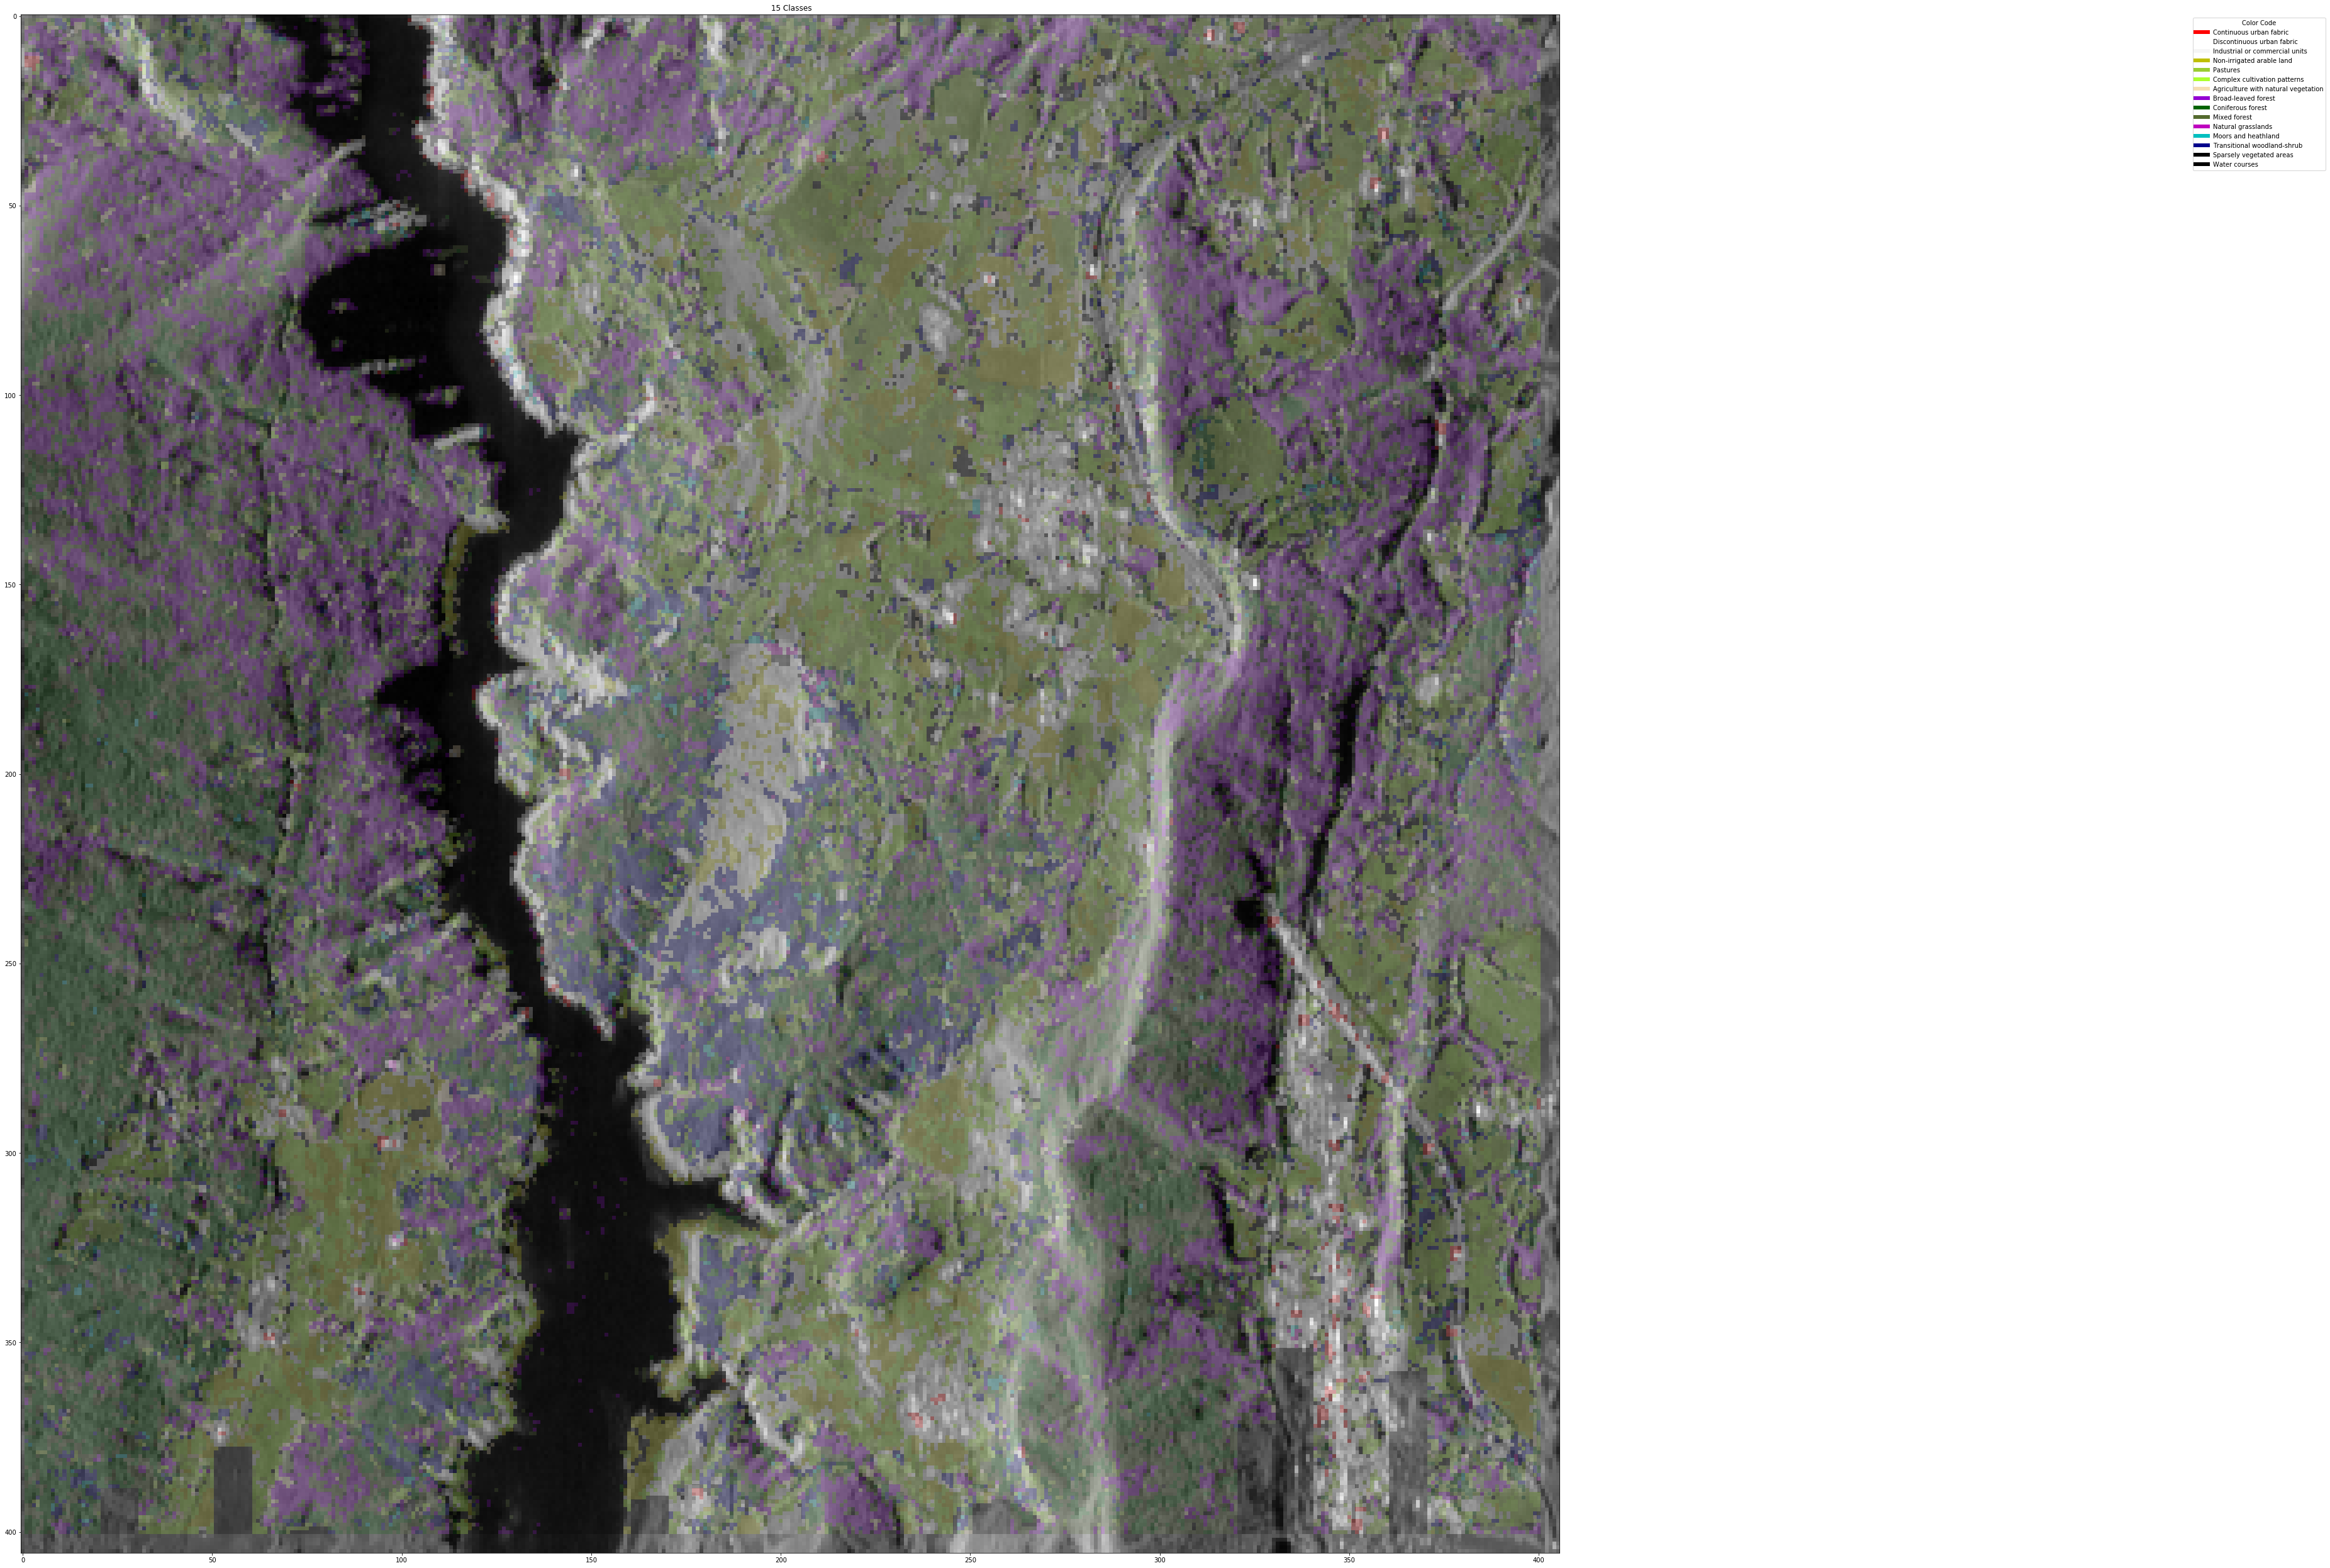

In [16]:
#%%time

from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image 

#model.load_state_dict(torch.load( modelpath ));

import torch.optim as optim
# specify loss function 
#criterion = nn.CrossEntropyLoss() 
#####################################
#%matplotlib auto 
#%matplotlib inline 

M = pooling(mat=np.log(A) , ksize=[1,4], method='mean', pad=False) 
#M = np.fliplr(M) 
# Create figure and axes 
fig, ax = plt.subplots( figsize=(45, 45) ) 
ax.imshow( M , cmap='gray' ) 

if max(set( COL ))>=14 :
    colors = [ 'r','w',cnames['whitesmoke'],  
              'y',cnames['yellowgreen'],cnames['greenyellow'],cnames['wheat'],  
              cnames['darkviolet'],cnames['darkgreen'],cnames['darkolivegreen'],  'm',  
              'c' ,  cnames['darkblue'],   
              'k' , 'k'  ] 
    """
    colors = [ cnames['white']      , cnames['whitesmoke'] , cnames['wheat'],  
               cnames['yellowgreen'], cnames['pink']       , cnames['peru'] , cnames['peachpuff'],  
               cnames['darkgreen']  , cnames['lawngreen']  , cnames['forestgreen'],  
               cnames['violet']     , cnames['turquoise']  , cnames['azure'],   
               cnames['darkseagreen']          , 'k' ] 
    """
    print( max(set( COL )) )
else : 
    #colors = [ 'w', 'y', 'c', 'g', 'k', 'm'] 
    colors = [ 'r', 'y', 'c', 'g', 'k', 'm'] 
    print( max(set( COL )) )
#####################################


for i in range( len(COORDs) ) : 
    #if (100-(COORDs[i][0]%100))>=12 : 
    rect = patches.Rectangle( ( 1+((COORDs[i][0]%Cref)/4)-0.5 , 1+COORDs[i][1]%Lref-0.5  ) , 
                             1, 1, 
                             linewidth = 0.1, 
                             edgecolor = 'none' , 
                             facecolor = colors[ COL[i] ] ,
                             alpha=0.2) 
    # Add the patch to the Axes 
    ax.add_patch(rect) 

plt.title( f" {max(set( COL ))+1} Classes" ) 
for i in range( max(set( COL ))+1 ) : 
    if  max(set( COL )) < 10 : 
        LColors = [1, 12, 18, 23, 24, 26] 
        plt.plot( [10],[10], c=f'{colors[i]}', label=f'{uf.LabelsList()[LColors[i]]}',linewidth=6.0 ) 
        plt.legend(loc='upper right',
               title='Color Code', 
               bbox_to_anchor=(1.5, 1.),
               ncol=1, 
               fancybox=True, 
               shadow=False) 
    else : 
        #LColors = [1,12,18,23,24,26] 
        plt.plot( [10],[10], c=f'{colors[i]}', label=f'{uf.LabelsList()[LColors[i]]}',linewidth=6.0 ) 
        plt.legend(loc='upper right',
               title='Color Code', 
               bbox_to_anchor=(1.5, 1.),
               ncol=1, 
               fancybox=True, 
               shadow=False) 

#plt.savefig('Figure_Harmaliere_10x10.svg', format='svg', dpi=1200)
plt.savefig('Figure_Harmaliere_10mx10m__15Cl_123-red_StrgColrs_alpha=20.png')
#fig.savefig('Figure_Harmaliere_10mx10m_15Cl.pdf')
#fig.savefig('Figure_Harmaliere_10mx10m.png', dpi=900)
#fig.savefig('Figure_Harmaliere_10mx10m.pdf', dpi=900)
plt.show() 
